# Projeto Integrador: Matemática Computacional (Group 34)
## Introduction

During sprint 2 we were tasked to find solutions for the user stories where matcp was relevant, that is, US9 to US11. These user stories use descriptive statistics that the students were tasked to study autonomously.

The work done in this file is a collaborative solution to the three user stories in Python along with the explanation of the results. Each cell of this Jupyter Notebook file will be explained using markdown cells like this one.

##### `Imports for all necessary libraries and global methods:`

In [13]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
def readInputInDF(df, column, message):
    output = ''
    while output not in df[column].values:
        output = input(message)
    return output

In [15]:
def readBetween(lowLimit, highLimit, message):
    output = -1
    while int(output) < int(lowLimit) or int(output) > int(highLimit):
        output = int(input(message))
    return output

---
# USER STORY 09

US09 - As a GSM, I want to know the exact costs referring to water consumption of specific green space so that I may manage these expenses efficiently. Therefore, within this US, the aim is to carry out a statistical analysis concerning the water consumption costs in all parks. The ”water consumption.csv” file provide the necessary data to carry out the study. This file records daily water consumption (in m3) since the day each park opened. The amount paid for water is 0.7 AC/m3, up to a consumption of 1000m3/month, with a fee of 15% added for higher consumption levels.

#### Solution in Python:

##### `Read water_consumption.csv file and prepare all data frames for US09`

In [16]:
waterc_file_path = "water_consumption.csv"
waterc_file_columnHeaders = ['Park', 'Year', 'Month', 'Day', 'Consumption']
monthsDesc = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

waterConsumption = pd.read_csv(waterc_file_path, names=waterc_file_columnHeaders, sep=';', decimal=',', skiprows=1)
waterConsumptionMatrix = waterConsumption.values

monthlyWaterConsumption = waterConsumption.groupby(["Park","Month"])["Consumption"].sum().reset_index()

globalWaterConsumption = monthlyWaterConsumption.groupby("Park")["Consumption"].sum().reset_index()
globalWaterConsumptionMatrix = globalWaterConsumption.values

#### `Barplot representing monthly water consumption:`

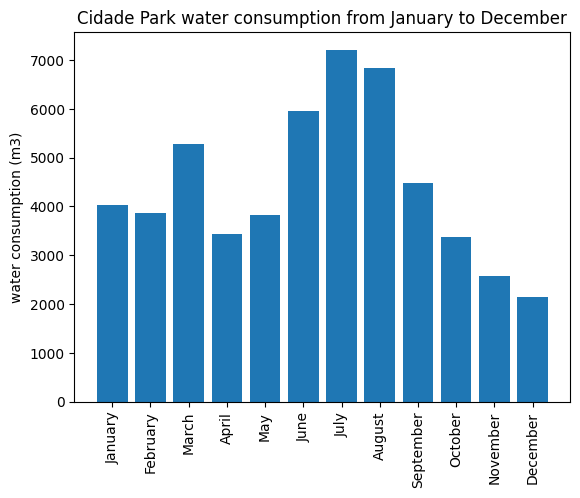

In [17]:
parkID = readInputInDF(monthlyWaterConsumption, monthlyWaterConsumption.columns[0], "What park would you like to see the water consumption for? ")
startMonth = readBetween(1, 12, "Enter the start month (1-12): ")
endMonth = readBetween(startMonth, 12, "Enter the end month (1-12): ")

parkMatrix = monthlyWaterConsumption[monthlyWaterConsumption[monthlyWaterConsumption.columns[0]] == parkID].values

fig, ax = plt.subplots()

months = monthsDesc[startMonth-1:endMonth]

values = [parkMatrix[i][2] for i in range(int(startMonth)-1, int(endMonth))]

ax.bar(months, values)

ax.set_ylabel('water consumption (m3)')
ax.set_title(parkID + ' Park water consumption from ' + monthsDesc[startMonth-1] + ' to ' + monthsDesc[endMonth-1])

plt.xticks(rotation='vertical')

plt.show() 


# Interpretation of the results

To get the total consumption of the selected park's consumption for each month, we have to group the inicial data by Park Name and Month and Sum the values of Water Consumption.

Using Pandas library we can use the Data Frame to easily group and sum rows.

#### `Monthly costs:`

In [18]:
numberOfParks = int(input("How many parks would you like to see monthly costs for? "))
while numberOfParks < 1:
    numberOfParks = int(input("How many parks would you like to see monthly costs for? "))
park = list(range(numberOfParks))
for i in range(0, numberOfParks):
    park[i] = input("Enter the "+ str(i + 1) +" park name: ")
    while park[i] not in globalWaterConsumptionMatrix[:,0]:
        park[i] = input("Enter the "+ str(i + 1) +" park name: ")

costUntil1000 = 0.7;
extraAfter1000Percent = 0.15;

for i in range(0, numberOfParks):
    index = np.where(globalWaterConsumptionMatrix[:, 0] == park[i])[0]
    costCont = 0
    if globalWaterConsumptionMatrix[index,1] > 1000:
        costCont = 1000 * costUntil1000;
        costExtra = (globalWaterConsumptionMatrix[index,1] - 1000) * costUntil1000
        costCont = costCont + costExtra * extraAfter1000Percent + costExtra;
    else:
        costCont = globalWaterConsumptionMatrix[i,1] * costUntil1000
    
    print("The total cost for the " + globalWaterConsumptionMatrix[index[0],0] + " park water consumption is: " + str(round(costCont[0], 2)) + "€")

The total cost for the Cidade park water consumption is: 42564.6€


# Interpretation of the results

To get the total cost for a park we set the base value for 1m^3 of water comsumed, then, for each park we calculate how
much did they spend in total and multiply by the base value until 1000m^3, after that, we add an extra 15% for the cost

#### `Statistical Analysis:`

In [19]:
def create_histograms(data, title):
    
    # Extract water consumption data (assuming it's in the last column)
    water_consumption = data[:, -1]
    park_name = data[0][0]

    # Create histograms with 10 and 100 classes
    plt.figure(figsize=(12, 6))

    # Histogram with 10 classes
    plt.subplot(1, 2, 1)
    plt.hist(water_consumption, bins=10, color='skyblue', edgecolor='black')
    plt.title(title + ' park histogram (10 Classes)')
    plt.xlabel('Water Consumption')
    plt.ylabel('Frequency')

    # Histogram with 100 classes
    plt.subplot(1, 2, 2)
    plt.hist(water_consumption, bins=100, color='lightgreen', edgecolor='black')
    plt.title(title + ' park histogram (100 Classes)')
    plt.xlabel('Water Consumption')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [20]:
def find_outliers(data):
    # Group data by park (assuming the park is in the first column)
    parks = np.unique(data[:, 0])
    
    # Iterate over each park
    for park in parks:
        park_data = data[data[:, 0] == park][:, -1]  # Extract consumption data for the park
        
        # Calculate median and interquartile range (IQR)
        median = np.median(park_data)
        q1 = np.percentile(park_data, 25)
        q3 = np.percentile(park_data, 75)
        iqr = q3 - q1
        
        # Determine lower and upper bounds for outliers
        lower_bound = median - 1.5 * iqr
        upper_bound = median + 1.5 * iqr
        
        # Identify outliers
        outliers = park_data[(park_data < lower_bound) | (park_data > upper_bound)]
        
        if len(outliers) > 0:
            print(str(outliers.size) + " outliers found in " + park + " park")

# Example usage:
# Assuming 'data' is your matrix
# find_outliers(data)


In [21]:
def create_frequency_table(matrix, title):
    # Define the number of classes
    classes = 5

    # Get the range of consumption
    range_consumption = np.max(matrix[:, 4]) - np.min(matrix[:, 4])

    # Calculate the class width
    class_width = range_consumption / classes

    # Define the class boundaries
    class_boundaries = np.linspace(np.min(matrix[:, 4]), np.max(matrix[:, 4]), classes + 1)

    # Count elements within each class using numpy's histogram function
    counts, _ = np.histogram(matrix[:, 4], bins=class_boundaries)

    # Generate class labels based on class boundaries
    class_labels = [f'{class_boundaries[i]:.2f} - {class_boundaries[i+1]:.2f}' for i in range(len(class_boundaries) - 1)]

    # Calculate relative frequencies
    total_count = sum(counts)
    relative_frequencies = [round(count / total_count, 4) for count in counts]

    # Create a table as a subplot
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.axis('tight')
    ax.axis('off')

    # Combine data into a list of lists
    table_data = [[class_labels[i], counts[i], relative_frequencies[i]] for i in range(len(class_labels))]

    # Create the table
    table = ax.table(cellText=table_data, colLabels=['Water consumption', 'Absolute Frequency', 'Relative Frequency'], loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)  # Scale the table font size
    # Add a title
    plt.suptitle('Frequency Table for ' + title + " park water consumption.", y=0.95, fontsize=16, fontweight='bold')

    # Show the table
    plt.show()

#### `For the park with the least and for the park with the biggest consumptions:`
#### `Calculate Mean, Median, Standard Deviation, Coeficient of Skewness, Find Outliers, Create Frequency tables, Create Histograms:`

The park with the biggest consumption is: Cidade with a consumption of 53005.70861241m3
- Mean consumption: 116.24058906230275m3
- Median consumption: 85.995m3
- Standard deviation: 71.64618215775621
- Coeficient of skewness: 1.2664564175536508

The park with the least consumption is: ArcaAgua with a consumption of 4102.172728763m3
- Mean consumption: 8.995992826234655m3
- Median consumption: 6.7718554315m3
- Standard deviation: 4.847045847286719
- Coeficient of skewness: 1.376593577702396


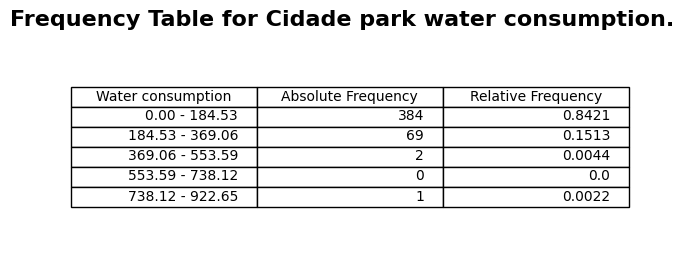

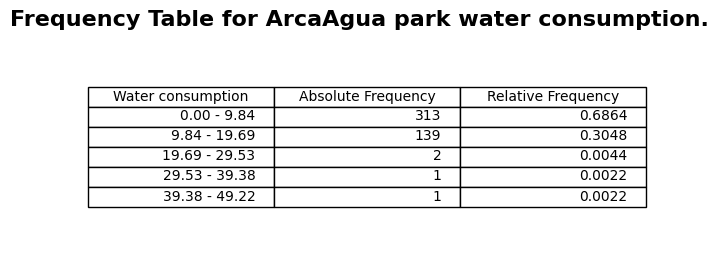

62 outliers found in Cidade park
62 outliers found in ArcaAgua park


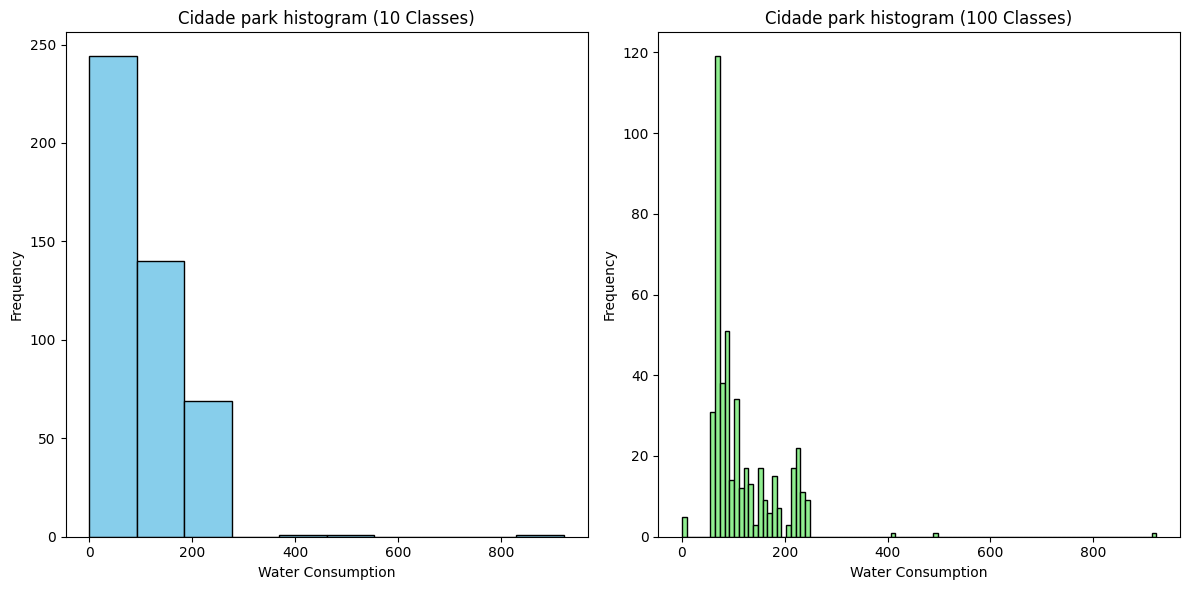

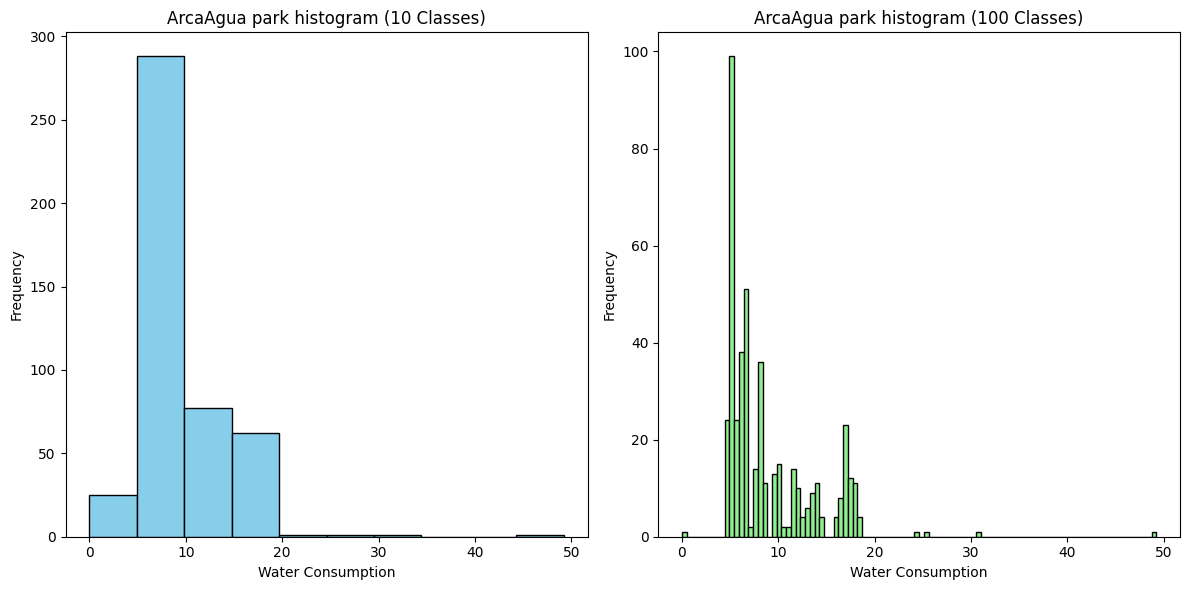

In [22]:
parkBiggerConsumption = globalWaterConsumptionMatrix[np.argmax(globalWaterConsumptionMatrix[:,1])]
parkLeastConsumption = globalWaterConsumptionMatrix[np.argmin(globalWaterConsumptionMatrix[:,1])]

onlyBiggestPark = waterConsumptionMatrix[waterConsumptionMatrix[:,0] == parkBiggerConsumption[0]]
onlyLeastPark = waterConsumptionMatrix[waterConsumptionMatrix[:,0] == parkLeastConsumption[0]]

biggerParkMean = np.mean(onlyBiggestPark[:,4])
biggerParkMedian = np.median(onlyBiggestPark[:,4])
biggerParkStandardDeviation = np.std(onlyBiggestPark[:,4])
biggerParkCoeficientOfSkewness = (3 * (biggerParkMean - biggerParkMedian)) / biggerParkStandardDeviation

print("The park with the biggest consumption is: " + parkBiggerConsumption[0] + " with a consumption of " + str(parkBiggerConsumption[1]) + "m3")
print("- Mean consumption: " + str(biggerParkMean) + "m3")
print("- Median consumption: " + str(biggerParkMedian) + "m3")
print("- Standard deviation: " + str(biggerParkStandardDeviation))
print("- Coeficient of skewness: " + str(biggerParkCoeficientOfSkewness))

leastParkMean = np.mean(onlyLeastPark[:,4])
leastParkMedian = np.median(onlyLeastPark[:,4])
leastParkStandardDeviation = np.std(onlyLeastPark[:,4])
leastParkCoeficientOfSkewness = (3 * (leastParkMean - leastParkMedian)) / leastParkStandardDeviation

print("")
print("The park with the least consumption is: " + parkLeastConsumption[0] + " with a consumption of " + str(parkLeastConsumption[1]) + "m3")
print("- Mean consumption: " + str(leastParkMean) + "m3")
print("- Median consumption: " + str(leastParkMedian) + "m3")
print("- Standard deviation: " + str(leastParkStandardDeviation))
print("- Coeficient of skewness: " + str(leastParkCoeficientOfSkewness))

create_frequency_table(onlyBiggestPark, parkBiggerConsumption[0])
create_frequency_table(onlyLeastPark, parkLeastConsumption[0])

find_outliers(onlyBiggestPark)
find_outliers(onlyLeastPark)

create_histograms(onlyBiggestPark, parkBiggerConsumption[0])
create_histograms(onlyLeastPark, parkLeastConsumption[0])

# Interpretation of the results

Mean: The mean is the average value of the dataset. It's calculated by summing all the values in the dataset and then dividing by the number of values.

Median: The median is the middle value of the dataset when it's sorted in ascending or descending order. If the dataset has an odd number of observations, the median is the middle number. If it has an even number of observations, the median is the average of the two middle numbers.

Standard Deviation: The standard deviation measures the amount of variation or dispersion in the dataset. It's calculated by taking the square root of the average of the squared differences from the mean.

Coefficient of Skewness: The skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. A negative skew indicates that the left tail is longer or fatter than the right tail. A positive skew indicates that the right tail is longer or fatter than the left tail.

Absolute Frequency Table: An absolute frequency table shows the number of times each value appears in the dataset. It's created by counting the occurrences of each consumption within the five classes.

Relative Frequency Table: A relative frequency table shows the proportion of times each value appears in the dataset. It's created by dividing the count of each absolute value by the number of values in the five classes.

Outliers: We detect outliers using the IQR method, where values less than Q1 - 1.5 * IQR or greater than Q3 + 1.5 * IQR are considered outliers. Q1 and Q3 are the first and third quartiles of the dataset, respectively, and IQR is the interquartile range, which is the difference between Q3 and Q1.

Histogram: We created the histograms by dividing the range of the data into a series of intervals and then counting how many data points fall into each interval. The intervals are plotted on the x-axis, and the counts are plotted on the y-axis. For this US we used 10 classes and 100 classes.

---
# USER STORY 10
### - US10 - As a GSM, I want to know which piece(s) of equipment is/are used in each day so that I can understand the users’ preferences. Consider that the park has several equipment like, for instance, walking trails, picnic area and exercise gymnastics equipment. At the park exit there is an electronic device with a list of all the equipment, in which the user(s) must indicate the equipment they used that day.

#### Solution in Python:

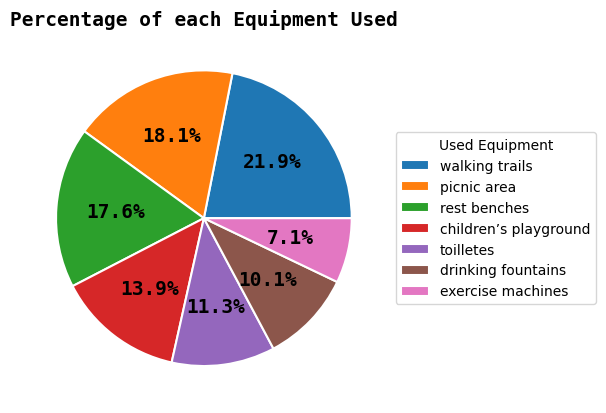

In [23]:

# Define the name of the CSV file
file = "EquipmentUsed.csv"

# Read the CSV file into a DataFrame
equipmentUsedDF = pd.read_csv(file)

equipmentCountDF = equipmentUsedDF['Equipment'].value_counts()

labels = equipmentCountDF.index.tolist()
values = equipmentCountDF.values.tolist()

font = {'family': 'monospace', 'color': 'black', 'weight': 'semibold', 'size': 14}

wedges, texts, autotexts = plt.pie(values, autopct='%1.1f%%', wedgeprops={'edgecolor': 'white', 'linewidth': 1.5})

# Set font properties for texts and autotexts
for text in texts:
    text.set_fontsize(font['size'])
    text.set_fontfamily(font['family'])
    text.set_color(font['color'])
    text.set_fontweight(font['weight'])

for autotext in autotexts:
    autotext.set_fontsize(font['size'])
    autotext.set_fontfamily(font['family'])
    autotext.set_color(font['color'])
    autotext.set_fontweight(font['weight'])

plt.title("Percentage of each Equipment Used", fontdict=font)
# Place the legend to the right of the pie chart
plt.legend(labels=labels, loc="center left", bbox_to_anchor=(1, 0.5), title="Used Equipment")

plt.show()


# Interpretation of the results

To get the percentage of each equipment used we start by summing how many times each equipment appears on our file, then we get the total answers, then for each ammount of uses of a equipment we divide it by the total and multiply it by 100 getting the percentage of use.

The percentage of use for each piece of equipment can be calculated using the following formula:

$$
\text{{Percentage of use for equipment X}} = \left( \frac{{\text{{Number of uses of equipment X}}}}{{\text{{Total number of equipment uses}}}} \right) \times 100
$$


Where:
- `Number of uses of equipment X` is the count of how many times equipment X appears in our file.
- `Total number of equipment uses` is the sum of the uses of all equipment.

---
# USER STORY 11
### - US11

#### Solution in Python:

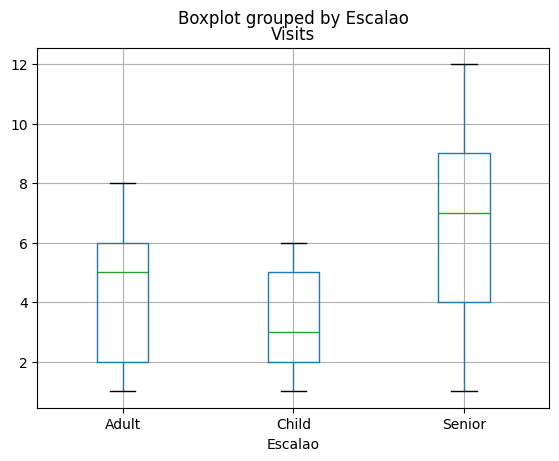

Y/N        N   Y  Proportion
Escalao                     
Adult     83  99    0.543956
Child     69  62    0.473282
Senior   102  85    0.454545


In [24]:
df = pd.read_csv('Inquiry.csv', sep=';')

df.columns = ['Escalao', 'Y/N', 'Visits']

age_group_map = {1: 'Child', 2: 'Adult', 3: 'Senior'}
df['Escalao'] = df['Escalao'].map(age_group_map)

df.boxplot(column='Visits', by='Escalao')

plt.show()

grouped = df.groupby(['Escalao', 'Y/N'])

recommendation_counts = grouped.size().unstack(fill_value=0)

recommendation_counts['Proportion'] = recommendation_counts['Y'] / (recommendation_counts['Y'] + recommendation_counts['N'])

print(recommendation_counts)

# Interpretation of the results

Based on the results we can say that from the child group 62 of the 131 would recommend, from the adult group 99 of the 182 would recommend and from the senior group 85 of the 187 would recommend. So from the every group the only group that have negative recommendation is the senior group because 102 would not recommend the park.

---
## Contribution of each member of the group to the development of the work

#### `33%` - Rui Santiago(1221402)
#### `33%` - Francisco Trocado(1230608)
#### `33%` - Diógenes Jesus(1210879)
#### `0%` - Alexandre Moura(1231193)
#### `100%` 
#### Doesn't have MATCP - Pedro Costa(1221790)